<a href="https://colab.research.google.com/github/Tamilselvan-AIengineer/Deep_Learning_Techniques_-21AIC301J/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.0MB/s]


Epoch [1/10], Loss: 0.051368
Epoch [2/10], Loss: 0.044612
Epoch [3/10], Loss: 0.042014
Epoch [4/10], Loss: 0.041758
Epoch [5/10], Loss: 0.039773
Epoch [6/10], Loss: 0.036724
Epoch [7/10], Loss: 0.036091
Epoch [8/10], Loss: 0.035772
Epoch [9/10], Loss: 0.036460
Epoch [10/10], Loss: 0.031775


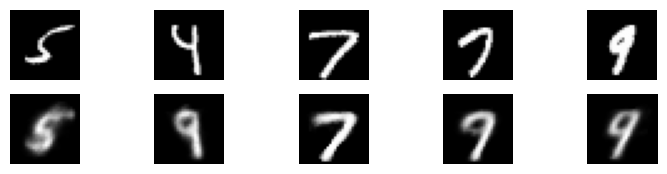

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Load Dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# 2. Define Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)   # compressed representation
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 3. Initialize model, loss, optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 4. Training loop
num_epochs = 10
losses = []  # List to store loss values
for epoch in range(num_epochs):
    for data, _ in train_loader:
        output = model(data)
        loss = criterion(output, data.view(-1, 28*28))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item()) # Store loss at the end of each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# 5. Plotting the loss
plt.figure()
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.show()


# 6. Visualization
test_img = next(iter(train_loader))[0][:5]
with torch.no_grad():
    reconstructed = model(test_img)

plt.figure(figsize=(9, 2))
for i in range(5):
    # original
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i][0], cmap='gray')
    plt.axis('off')
    # reconstructed
    plt.subplot(2, 5, i+6)
    plt.imshow(reconstructed[i].view(28,28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# 6. Visualization
test_img = next(iter(train_loader))[0][:5]
with torch.no_grad():
    reconstructed = model(test_img)

plt.figure(figsize=(9, 2))
for i in range(5):
    # original
    plt.subplot(2, 5, i+1)
    plt.imshow(test_img[i][0], cmap='gray')
    plt.axis('off')
    # reconstructed
    plt.subplot(2, 5, i+6)
    plt.imshow(reconstructed[i].view(28,28), cmap='gray')
    plt.axis('off')
plt.show()